In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd

metadata = pd.read_csv('/Users/janneke/Documents/data/ocr/align_metadata.csv', index_col=0, encoding='utf-8')
print metadata

                          doc_id  edit_distance  seq1_length  seq2_length
BAObi1-metadata.json      BAObi1             15          777          763
BAObi10-metadata.json    BAObi10             50         1643         1606
BAObi100-metadata.json  BAObi100              8          407          399
BAObi101-metadata.json  BAObi101             10          326          320
BAObi102-metadata.json  BAObi102             23          955          936
BAObi103-metadata.json  BAObi103             15          203          198
BAObi104-metadata.json  BAObi104             14         1021         1008
BAObi105-metadata.json  BAObi105             18         1076         1061
BAObi106-metadata.json  BAObi106             30          842          816
BAObi107-metadata.json  BAObi107              6          444          439
BAObi108-metadata.json  BAObi108             17          563          551
BAObi109-metadata.json  BAObi109             26         1441         1419
BAObi11-metadata.json    BAObi11      

In [4]:
metadata['score'] =  metadata['edit_distance']/metadata['seq1_length']*100
print 'min:', metadata['score'].min()
print 'max:', metadata['score'].max()
print 'mean:', metadata['score'].mean()
print 'std:', metadata['score'].std()
# verschillen deze statistieken significant per krant? (zo ja, wat zegt dat, zo nee, wat zegt dat?)
# zo ja, dan zijn sommige kranten gemakkelijker te ocr-ren dan andere, dit kan komen door lettertype of kwaliteit krantenpapier
# zo nee, dan zijn die verschillen er niet

min: 0.0
max: 177.49210645
mean: 3.64744318667
std: 6.63423700019


In [5]:
def extract_newspaper(row):
    """Get the newspaper name based on the doc_id."""
    newspaper_mapping = {
        'BA': 'AD',
        'BN': 'NRC',
        'BTO': 'Telegraaf',
        'BTR': 'Trouw',
        'BV': 'Volkskrant'
    }
    for code, np in newspaper_mapping.items():
        if row['doc_id'].startswith(code):
            return np
    return 'None'

metadata['newspaper'] = metadata.apply(extract_newspaper, axis=1)
print metadata

                          doc_id  edit_distance  seq1_length  seq2_length  \
BAObi1-metadata.json      BAObi1             15          777          763   
BAObi10-metadata.json    BAObi10             50         1643         1606   
BAObi100-metadata.json  BAObi100              8          407          399   
BAObi101-metadata.json  BAObi101             10          326          320   
BAObi102-metadata.json  BAObi102             23          955          936   
BAObi103-metadata.json  BAObi103             15          203          198   
BAObi104-metadata.json  BAObi104             14         1021         1008   
BAObi105-metadata.json  BAObi105             18         1076         1061   
BAObi106-metadata.json  BAObi106             30          842          816   
BAObi107-metadata.json  BAObi107              6          444          439   
BAObi108-metadata.json  BAObi108             17          563          551   
BAObi109-metadata.json  BAObi109             26         1441         1419   

AD
min: 0.0
max: 9.91316931983
mean: 2.14860908663
std: 1.10700714301

NRC
min: 0.0
max: 77.1626297578
mean: 4.08534663853
std: 6.3411251692

Telegraaf
min: 0.0
max: 177.49210645
mean: 4.87364494199
std: 10.6857105652

Trouw
min: 0.0
max: 108.045977011
mean: 4.0167583992
std: 7.37263583541

Volkskrant
min: 0.278551532033
max: 27.2351183636
mean: 3.29760729219
std: 2.29231569515



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112f6b490>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x115a7e650>]], dtype=object)

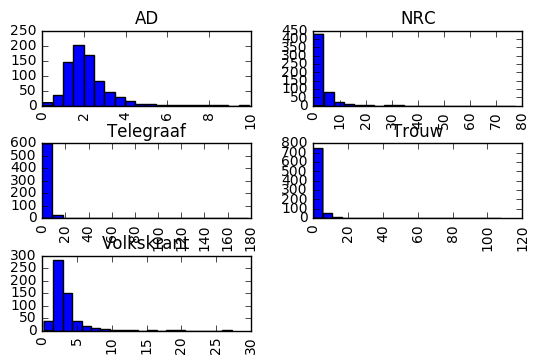

In [6]:
grouped = metadata.groupby('newspaper')

for name, group in grouped:
    print name
    print 'min:', group['score'].min()
    print 'max:', group['score'].max()
    print 'mean:', group['score'].mean()
    print 'std:', group['score'].std()
    print

metadata.hist(bins=20, by='newspaper', column='score')

In [ ]:
from scipy.stats import scipy

In [7]:
changes = pd.read_csv('/Users/janneke/Documents/data/ocr/align_changes.csv', index_col=0, encoding='utf-8')
changes = changes.fillna('')
changes['newspaper'] = changes.apply(extract_newspaper, axis=1)
print len(changes)
grouped = changes.groupby(['from', 'to'])
result = grouped.sum()
result[result['num'] > 50].sort_values(by='num', ascending=False)

41748


df    num
from to             
-        3211  36256
         2462  12694
          850   2381
     .   1158   1718
.    ,    748   1297
-         564    800
.         567    771
     "    462    761
,    .    508    675
I    i    336    505
'         374    435
          130    376
i    l    292    371
y    ij   247    363
..        253    348
l    i    242    343
,         267    327
e    c    225    310
i    j    209    306
ü    ij   221    276
c    e    202    233
"         168    232
r    e    133    223
.         172    214
i         172    211
l    t    169    197
o    e    158    195
i    r    164    191
     e    125    175
     ,    141    165
...       ...    ...
(          46     72
           44     71
de   DE    22     71
ď    ï     56     71
    f     39     69
o    p     64     69
     s     59     66
I    l     55     66
t    l     59     65
e          46     65
     l     53     65
r    c     58     64
     g     56     63
e    ë     49     63
T    v     36     62
     i     57     61
<=         48     60
*    s     58     59
K    R     54     59
l          50     59
a    n     50     58
r.   n     54     58
'    t     53     57
u    n     53     56
«    s     47     55
1    l     52     55
     d     44     55
m    in    51     53
li   h     47     52
s    e     47     51

[107 rows x 2 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12d34f250>]], dtype=object)

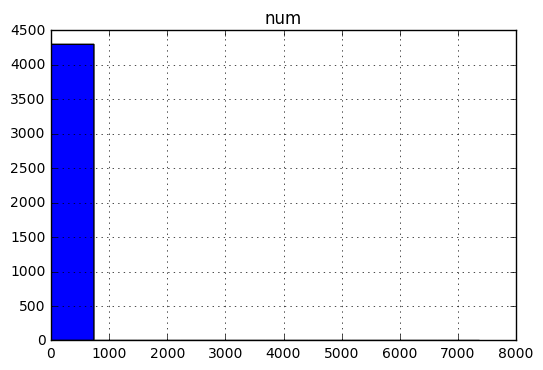

In [118]:
grouped = changes.groupby('newspaper')



grouped.get_group('Telegraaf').groupby(['from', 'to']).sum().hist(column='num')

In [65]:
print len(grouped)

12601


In [70]:
def get_error_type(row):
    f = len(row['from'])
    t = len(row['to'])
    
    if f > t:
        return 'D'
    elif f < t:
        return 'I'
    else:
        return 'S'
    
changes['error'] = changes.apply(get_error_type, axis=1)

In [75]:
print changes.groupby('error').count()['doc_id']

error
D    15698
I     9623
S    16427
Name: doc_id, dtype: int64


In [93]:
changes.groupby('error').get_group('I').groupby(['from', 'to']).sum().sort_values(by='num', ascending=False)

df   num
from to                                
                              850  2381
     .                       1158  1718
     "                        462   761
y    ij                       247   363
ü    ij                       221   276
     e                        125   175
     ,                        141   165
     t                        104   136
     n                        106   135
     (                         94   127
     r                         85   102
U    ij                        79    92
     -                         75    80
     s                         59    66
     l                         53    65
     g                         56    63
     i                         57    61
     d                         44    55
m    in                        51    53
     j                         46    50
m    ni                        39    41
     Â                          8    34
     o                         29    33
     de                        28    32
     a                         27    30
     en                        25    28
u    ij                        25    27
     k                         26    26
     v                         24    26
n    ri                        18    19
...                           ...   ...
     wijde                      1     1
     zij                        1     1
     wikk                       1     1
     wil                        1     1
     wing                       1     1
     winkelier                  1     1
     witte                      1     1
     wo                         1     1
     wonderde ons dan ook n     1     1
     woo                        1     1
     woord                      1     1
     wordt                      1     1
     y, e                       1     1
     ydney                      1     1
     zagen                      1     1
     zaken                      1     1
     zegd, da                   1     1
     zegenende                  1     1
     zeggen                     1     1
     zelf                       1     1
     zelfs geen                 1     1
     zes s                      1     1
     zet                        1     1
     zic                        1     1
     zich                       1     1
     zich geroepen.             1     1
     zichzelf                   1     1
     zien."                     1     1
     ziet,                      1     1
™°   voo                        1     1

[4255 rows x 2 columns]

In [103]:
def short_to(row):
    if len(row.name[1]) <= 3:
        return True
    return False
df = changes.groupby('error').get_group('I').groupby(['from', 'to']).sum()
print len(df)
df[df.apply(short_to, axis=1)].sort_values(by='num', ascending=False)

4255


df   num
from to             
           850  2381
     .    1158  1718
     "     462   761
y    ij    247   363
ü    ij    221   276
     e     125   175
     ,     141   165
     t     104   136
     n     106   135
     (      94   127
     r      85   102
U    ij     79    92
     -      75    80
     s      59    66
     l      53    65
     g      56    63
     i      57    61
     d      44    55
m    in     51    53
     j      46    50
m    ni     39    41
     Â       8    34
     o      29    33
     de     28    32
     a      27    30
     en     25    28
u    ij     25    27
     k      26    26
     v      24    26
g    ij     19    19
...        ...   ...
-    r:      1     1
     nen     1     1
     men     1     1
     ln      1     1
     li"     1     1
     ker     1     1
     het     1     1
-    ben     1     1
     gen     1     1
     gev     1     1
.    den     1     1
.    ate     1     1
     ant     1     1
.    ze      1     1
     va      1     1
     un      1     1
     jk      1     1
     il,     1     1
     en      1     1
     d,      1     1
-    nig     1     1
.    at      1     1
     Wie     1     1
     0,      1     1
     -,      1     1
     -       1     1
     ",      1     1
-w   300     1     1
-    nis     1     1
™°   voo     1     1

[1707 rows x 2 columns]

In [11]:
def print_row2(row):
    print u'"{}"\t"{}"\t{}'.format(row.name[0], row.name[1], row['num'])

changes.groupby(['from', 'to']).sum().sort_values(by='num', ascending=False).apply(print_row2, axis=1)

"- "	""	36256
" "	""	12694
""	" "	2381
""	"."	1718
"."	","	1297
"-"	""	800
"."	""	771
""	"""	761
","	"."	675
"I"	"i"	505
"'"	""	435
"  "	""	376
"i"	"l"	371
"y"	"ij"	363
".."	""	348
"l"	"i"	343
","	""	327
"e"	"c"	310
"i"	"j"	306
"ü"	"ij"	276
"c"	"e"	233
"""	""	232
"r"	"e"	223
". "	""	214
"i"	""	211
"l"	"t"	197
"o"	"e"	195
"i"	"r"	191
""	"e"	175
""	","	165
"b"	"h"	146
"i"	"t"	139
""	"t"	136
"n"	"h"	135
""	"n"	135
"c"	"è"	134
"h"	"b"	130
" ?"	"*"	129
"-"	"."	129
"a"	"e"	129
""	"("	127
" "	"."	124
"č"	"è"	122
"r"	"n"	112
"o"	"c"	111
",,"	""	109
"p"	"e"	107
"i"	"I"	107
"X"	"N"	103
""	"r"	102
"e"	"é"	101
"ni"	"m"	101
"«"	"e"	99
"t"	""	98
"d"	"ï"	96
"n"	"p"	92
"U"	"ij"	92
"s"	"g"	87
"é"	"e"	86
"»"	"s"	86
"t"	"e"	86
"e"	"g"	85
"a"	"s"	84
"»"	"e"	81
""	"-"	80
"a"	"d"	79
"/"	"-"	77
"n"	"u"	77
"r"	"i"	76
"j"	"i"	76
"'"	"""	75
"K"	"E"	74
"t"	"i"	74
"*"	"e"	74
"r"	""	74
",."	""	73
"<= "	""	73
"("	""	72
"ď"	"ï"	71
"de"	"DE"	71
"   "	""	71
"o"	"p"	69
""	"f"	69
"I"	"l"	66
""	"s"	66
"e"	""	65
"t"	"l"	

from           to     
-                         None
                          None
                          None
               .          None
.              ,          None
-                         None
.                         None
               "          None
,              .          None
I              i          None
'                         None
                          None
i              l          None
y              ij         None
..                        None
l              i          None
,                         None
e              c          None
i              j          None
ü              ij         None
c              e          None
"                         None
r              e          None
.                         None
i                         None
l              t          None
o              e          None
i              r          None
               e          None
               ,          None
                          ... 
;< ¦¦i >i >    R

In [56]:
grouped = changes.groupby('from')
result = grouped.get_group('b').groupby('to').sum()
print result.index
result

Index([         u'',        u' d',        u' n',         u'8',         u'B',
              u'Cl',         u'D',        u'Ho',         u'S',         u'U',
             u'ch ',         u'd',     u'drong',    u'ed ver',         u'g',
               u'h', u'had. Op d',       u'het',        u'in',        u'is',
         u'is vade', u'is voor d',         u'k',         u'm',        u'ni',
               u'o',        u'ov',         u'p',         u's',        u'sf',
             u'str',         u't',        u'to',         u'v',      u'word',
               u'z',        u'zo',         u'ö'],
      dtype='object', name=u'to')


,df,num
to,,
,7,8
d,1,1
n,1,1
8,1,1
B,6,6
Cl,1,1
D,2,2
Ho,1,1
S,1,1


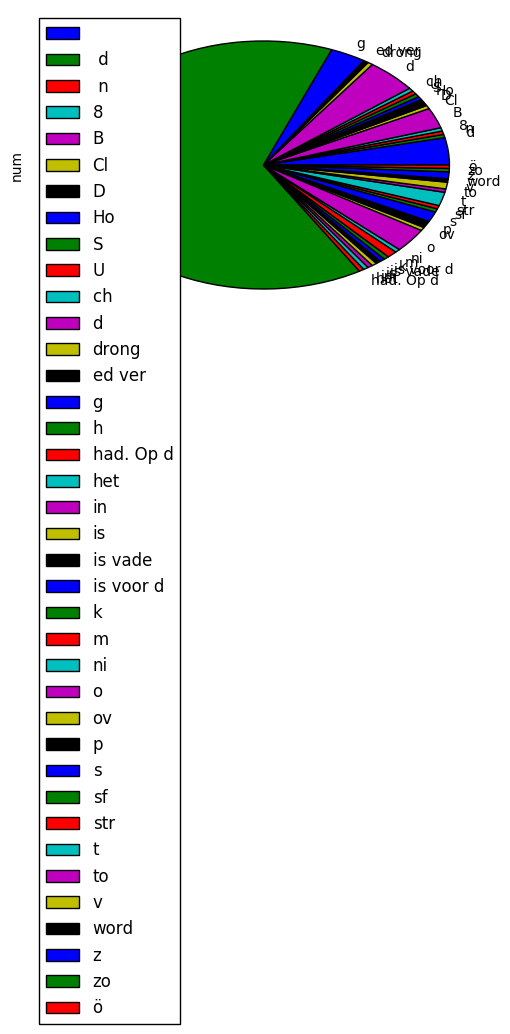

In [53]:
grouped.get_group('b').groupby('to').sum().plot.pie('num')

12601


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11304eed0>]], dtype=object)

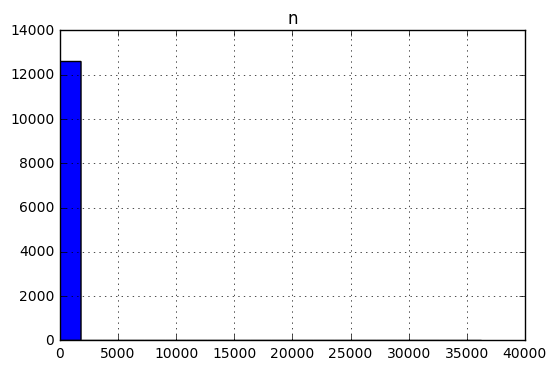

In [24]:
df = pd.DataFrame(nums, columns=['n'])
print len(df)
df.hist(column='n', bins=20)

In [23]:
df.groupby('n')
for n, g in df.groupby('n'):
    print n, len(g)

1 10471
2 871
3 336
4 169
5 112
6 91
7 62
8 55
9 29
10 30
11 31
12 24
13 22
14 12
15 15
16 15
17 14
18 9
19 6
20 11
21 6
22 7
23 6
24 4
25 1
26 8
27 6
28 7
29 7
30 6
31 6
32 4
33 4
34 5
35 5
36 2
38 1
39 5
40 2
41 3
42 1
43 6
44 2
45 1
46 1
47 2
50 1
51 1
52 1
53 1
55 3
56 1
57 1
58 2
59 3
60 1
61 1
62 1
63 2
64 1
65 3
66 2
69 2
71 3
72 1
73 2
74 4
75 1
76 2
77 2
79 1
80 1
81 1
84 1
85 1
86 3
87 1
92 2
96 1
98 1
99 1
101 2
102 1
103 1
107 2
109 1
111 1
112 1
122 1
124 1
127 1
129 3
130 1
134 1
135 2
136 1
139 1
146 1
165 1
175 1
191 1
195 1
197 1
211 1
214 1
223 1
232 1
233 1
276 1
306 1
310 1
327 1
343 1
348 1
363 1
371 1
376 1
435 1
505 1
675 1
761 1
771 1
800 1
1297 1
1718 1
2381 1
12694 1
36256 1


In [ ]:
changes.hist

In [ ]:
changes.